Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

#### 1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


#### 2. Investigate the dataset for missing or problematic data.

In [9]:
data.shape

(12684, 26)

In [11]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [13]:
data[['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']].head(5)




,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50
0,never,never,NaN,4~8,1~3
1,never,never,NaN,4~8,1~3
2,never,never,NaN,4~8,1~3
3,never,never,NaN,4~8,1~3
4,never,never,NaN,4~8,1~3


In [15]:
data.duplicated().sum()

74

#### Data Investigation Observations 

* Data set has 12684 rows and 26 columns

* Only `{temperature, has_children, toCoupon_GEQ5min, toCoupon_GEQ15min, direction_same, direction_opp, Y}` are the numeric features and remaining all the features were Categorical 

* Below features has missing values
    * car (12576 missing out of total rows 12684) => Non Critical for our modelling
    * Bar Visits (107 missing out of total rows 12684) => Critical for our modelling
    * CoffeeHouse  (217 missing out of total rows 12684) => Critical for our modelling     
    * CarryAway   (151 missing out of total rows 12684) => Critical for our modelling
    * RestaurantLessThan20 (130 missing out of total rows 12684) => Critical for our modelling
    * Restaurant20To50  (189 missing out of total rows 12684) => Critical for our modelling


* There are 74 redundant/duplicate rows


#### 3. Decide what to do about your missing data -- drop, replace, other...

Based on above data investigation observations, taking below decisions

* Dropping the Columns
  * Remove non critical fields which has large number of missing values
  * So drop the Car feature

* Replace the missing Values
  * For all critical fields with missing values, fill the values with one of the below commonly used approaches
    * **Mode Imputation**
       * Replace the missing values with most frequently occurred category.
    * **Lable with `UnKnown` Category**
       * This approach provides transparency on missing values
  * For simpliclity, decided to go with Mode Imputation 
 
* Renaming the feature name
  * Feature `Y` column is not self explanatory, so let's rename it as `isCouponAccepted`

* Remove redundant rows 
  * Remove if there any duplicate rows

In [20]:
# Remove duplicates 
data = data.drop_duplicates()

# Drop 'car' feature
filteredFeatures = data.drop(['car'], axis=1)

# Replace missing values, with mode of it's respective featue values
filteredFeatures['Bar'] = filteredFeatures['Bar'].fillna(filteredFeatures['Bar'].mode()[0])
filteredFeatures['CoffeeHouse'] = filteredFeatures['CoffeeHouse'].fillna(filteredFeatures['CoffeeHouse'].mode()[0])
filteredFeatures['CarryAway'] = filteredFeatures['CarryAway'].fillna(filteredFeatures['CarryAway'].mode()[0])
filteredFeatures['RestaurantLessThan20'] = filteredFeatures['RestaurantLessThan20'].fillna(filteredFeatures['RestaurantLessThan20'].mode()[0])
filteredFeatures['Restaurant20To50'] = filteredFeatures['Restaurant20To50'].fillna(filteredFeatures['Restaurant20To50'].mode()[0])

# Rename 'Y' feature name
enhancedFeatures = filteredFeatures.rename(columns = {'Y' : 'isCouponAccepted'})

In [22]:
# Verifications

# Ensure there is no missing values now
enhancedFeatures.isna().sum().sum()

# Ensure there is no duplicate rows
enhancedFeatures.duplicated().sum()

# Make sure the shape of the dataframe is intact excpet `car` featue drop & duplicate removals
enhancedFeatures.shape

(12610, 25)

#### 4. What proportion of the total observations chose to accept the coupon?



In [25]:
enhancedFeatures['isCouponAccepted'].value_counts(normalize=True) * 100

isCouponAccepted
1    56.756542
0    43.243458
Name: proportion, dtype: float64

Text(0.5, 0, 'isCouponAccepted (0=Not accepted, 1=Accepted)')

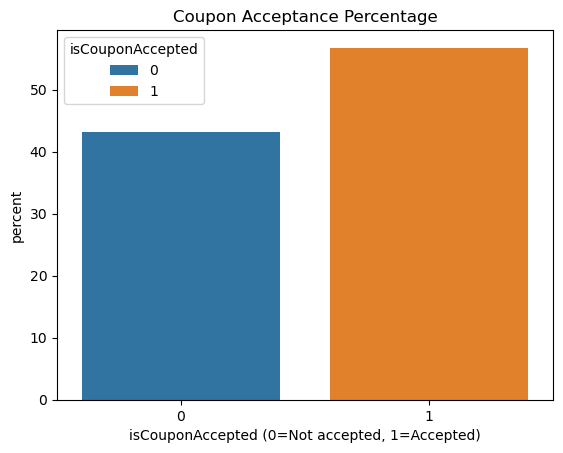

In [27]:
sns.countplot(enhancedFeatures, x = 'isCouponAccepted', stat="percent", hue='isCouponAccepted')
plt.title('Coupon Acceptance Percentage')
plt.xlabel('isCouponAccepted (0=Not accepted, 1=Accepted)') 

##### As we can see in above chart, 56.75% of the coupons were accepted

#### 5. Use a bar plot to visualize the `coupon` column.

In [31]:
enhancedFeatures[['coupon']].value_counts(normalize=True) * 100

coupon               
Coffee House             31.633624
Restaurant(<20)          22.038065
Carry out & Take away    18.588422
Bar                      15.939730
Restaurant(20-50)        11.800159
Name: proportion, dtype: float64

Text(0, 0.5, 'Issued Coupon Count')

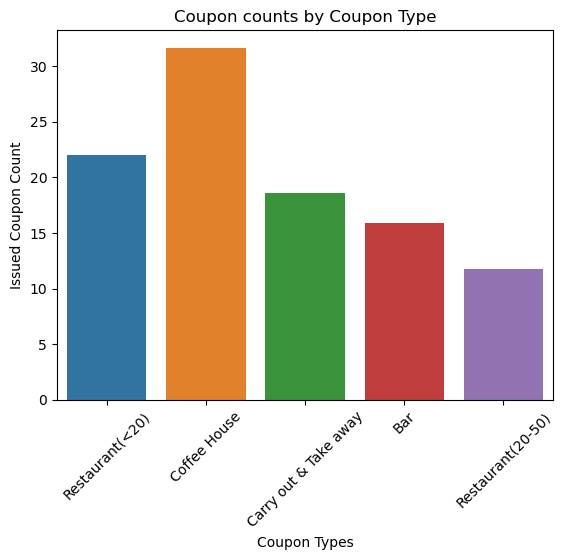

In [33]:
sns.countplot(enhancedFeatures, x = 'coupon', stat="percent", hue='coupon')
plt.title('Coupon counts by Coupon Type')
plt.xlabel('Coupon Types')
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Issued Coupon Count')

##### Observations 
* Highest coupons were issued for CoffeeHouse 
* And least coupons were issued for Restaurant(20-50)



##### Now let's see which type of coupons were morstly accepted 

In [37]:
acceptance_by_coupon_type = enhancedFeatures.query('isCouponAccepted == 1')

acceptance_by_coupon_type[['coupon']].value_counts(normalize=True) * 100

coupon               
Coffee House             27.790974
Restaurant(<20)          27.483583
Carry out & Take away    24.032416
Bar                      11.513204
Restaurant(20-50)         9.179824
Name: proportion, dtype: float64

Text(0, 0.5, 'Acceptance %')

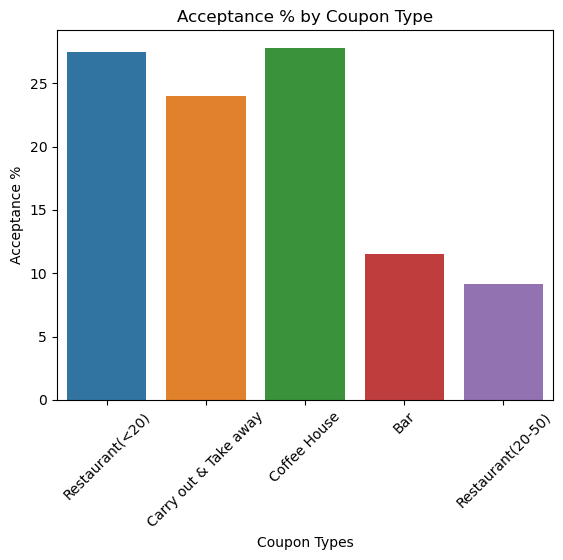

In [39]:
sns.countplot(acceptance_by_coupon_type, x = 'coupon', stat="percent", hue='coupon')
plt.title('Acceptance % by Coupon Type')
plt.xlabel('Coupon Types')
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Acceptance %')


In [41]:
coupon_type_acceptance = enhancedFeatures.groupby('coupon')[['isCouponAccepted']].value_counts().reset_index(name='Count')
coupon_type_acceptance.head(5)

,coupon,isCouponAccepted,Count
0,Bar,0,1186
1,Bar,1,824
2,Carry out & Take away,1,1720
3,Carry out & Take away,0,624
4,Coffee House,0,2000


Text(0, 0.5, 'Percentage')

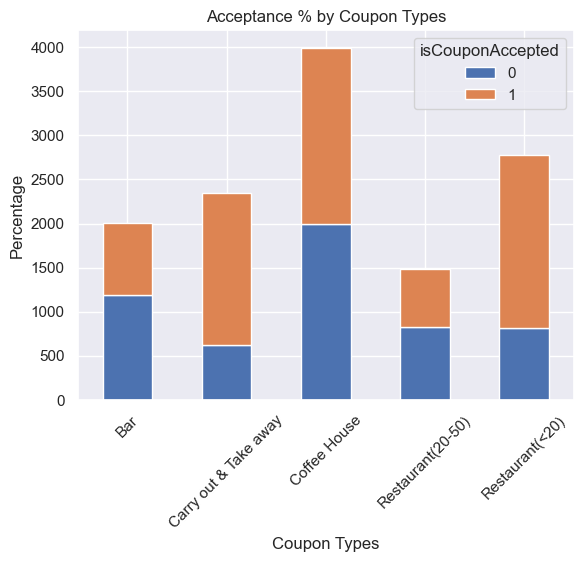

In [43]:
sns.set()
df_pivot = pd.pivot_table(coupon_type_acceptance, index='coupon', columns='isCouponAccepted', values='Count', aggfunc='sum')
df_pivot.plot.bar(stacked=True)

#sns.countplot(data=coupon_type_acceptance, x='coupon', stat="percent" , hue='isCouponAccepted')
plt.title('Acceptance % by Coupon Types')
plt.xlabel('Coupon Types')
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Percentage')

##### Observations
* Over all Coupon Acceptance is 56.7%
* Highest coupons were issues for Coffee House and where as least coupons issued for Costly Restaurants (>$20)
* Coffee House and Restaruant (<$20) has highest coupon acceptance %'s
* Costlier Restaurants has less acceptance compared to coupons issued

#### 6. Use a histogram to visualize the temperature column.

Text(0.5, 1.0, 'Temparature Histogram (with %)')

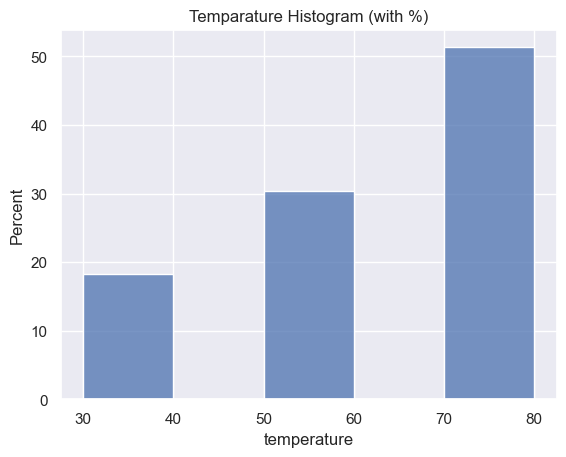

In [47]:
sns.histplot(data=enhancedFeatures['temperature'], stat='percent', binwidth=10)
plt.title('Temparature Histogram (with %)')

## Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [50]:
bar_coupons = enhancedFeatures.query("coupon == 'Bar'")

In [52]:
bar_coupons.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,isCouponAccepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


### 2. What proportion of bar coupons were accepted?


In [55]:
bar_coupons['isCouponAccepted'].value_counts(normalize=True) * 100

isCouponAccepted
0    59.004975
1    40.995025
Name: proportion, dtype: float64

Text(0.5, 0, 'isCouponAccepted (0=Not accepted, 1=Accepted)')

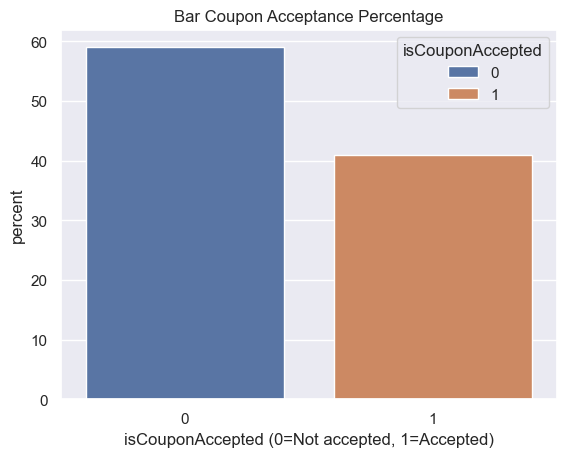

In [57]:
sns.countplot(bar_coupons, x = 'isCouponAccepted', stat="percent", hue='isCouponAccepted')
plt.title('Bar Coupon Acceptance Percentage')
plt.xlabel('isCouponAccepted (0=Not accepted, 1=Accepted)') 

### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [70]:
bar_coupons['Bar'].unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [90]:
less_than_3 = ['never', 'less1', '1~3']
more_than_3 = ['gt8', '4~8']
less_frequent_bar_visitors = bar_coupons.query("Bar in @less_than_3")
less_frequent_bar_visitors['Bar'].unique()

less_frequent_bar_visitors['isCouponAccepted'].value_counts(normalize=True) * 100

isCouponAccepted
0    62.948647
1    37.051353
Name: proportion, dtype: float64

In [92]:
more_frequent_bar_visitors = bar_coupons.query("Bar in @more_than_3")
more_frequent_bar_visitors['Bar'].unique()
more_frequent_bar_visitors['isCouponAccepted'].value_counts(normalize=True) * 100

isCouponAccepted
1    76.884422
0    23.115578
Name: proportion, dtype: float64

##### Observation :
- As expected, the coupon acceptance % is more for more frequent bar visitors

### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [126]:
more_than_1 = ['1~3', 'gt8', '4~8']

bar_visitors_over_age_of_25 = bar_coupons.query("(Bar in @more_than_1) and (age > '25') and (age != 'below21')")
bar_visitors_over_age_of_25['age'].unique()

array(['26', '31', '50plus', '41', '36', '46'], dtype=object)

In [128]:
bar_visitors_over_age_of_25['isCouponAccepted'].value_counts(normalize=True) * 100

isCouponAccepted
1    69.52381
0    30.47619
Name: proportion, dtype: float64

In [134]:
bar_visitors_over_age_of_25.shape

(420, 25)

In [140]:
remaining_bar_coupons = bar_coupons.drop(bar_visitors_over_age_of_25.index)
remaining_bar_coupons.shape

(1590, 25)

In [144]:
remaining_bar_coupons['isCouponAccepted'].value_counts(normalize=True) * 100

isCouponAccepted
0    66.540881
1    33.459119
Name: proportion, dtype: float64

##### Observation 
* Drivers with age > 25 and previously visited bar has `less` coupon acceptance % compare to remaining

### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [147]:
bar_coupons['occupation'].unique()

array(['Unemployed', 'Architecture & Engineering', 'Student',
       'Education&Training&Library', 'Healthcare Support',
       'Healthcare Practitioners & Technical', 'Sales & Related',
       'Management', 'Arts Design Entertainment Sports & Media',
       'Computer & Mathematical', 'Life Physical Social Science',
       'Personal Care & Service', 'Community & Social Services',
       'Office & Administrative Support', 'Construction & Extraction',
       'Legal', 'Retired', 'Installation Maintenance & Repair',
       'Transportation & Material Moving', 'Business & Financial',
       'Protective Service', 'Food Preparation & Serving Related',
       'Production Occupations',
       'Building & Grounds Cleaning & Maintenance',
       'Farming Fishing & Forestry'], dtype=object)

In [208]:
# Drivers with occupation other than 'Farming Fishing & Forestry' 
farming_occupation = ['Farming Fishing & Forestry']
non_farming_drivers = bar_coupons.query("occupation not in @farming_occupation")
non_farming_drivers['category']='non_farming_drivers'
#non_farming_drivers.info()
non_farming_drivers['isCouponAccepted'].value_counts(normalize=True) * 100


/var/folders/5x/hqlqcvq95b1gg6km71zbjyk00000gn/T/ipykernel_72937/3262875209.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_farming_drivers['category']='non_farming_drivers'


isCouponAccepted
0    59.02049
1    40.97951
Name: proportion, dtype: float64

In [210]:
# Drivers who visists more than once 
more_than_1 = ['1~3', 'gt8', '4~8']

drivers_visited_bar_atleast_once = bar_coupons.query("Bar in @more_than_1")
drivers_visited_bar_atleast_once['category']='drivers_visited_bar_atleast_once'
#drivers_visited_bar_atleast_once.info()
drivers_visited_bar_atleast_once['isCouponAccepted'].value_counts(normalize=True) * 100

/var/folders/5x/hqlqcvq95b1gg6km71zbjyk00000gn/T/ipykernel_72937/1372182884.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drivers_visited_bar_atleast_once['category']='drivers_visited_bar_atleast_once'


isCouponAccepted
1    68.791946
0    31.208054
Name: proportion, dtype: float64

In [154]:
# Drivers who don't have kid
bar_coupons['passanger'].unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

In [212]:
kids = ['Kid(s)']
drivers_without_kid_passengers = bar_coupons.query("occupation not in @kids")
drivers_without_kid_passengers['category']='drivers_without_kid_passengers'
#drivers_without_kid_passengers.info()
drivers_without_kid_passengers['isCouponAccepted'].value_counts(normalize=True) * 100

isCouponAccepted
0    59.004975
1    40.995025
Name: proportion, dtype: float64

In [244]:
# Merging all the above data frames 
bar_drivers_union_df = pd.merge(pd.merge(non_farming_drivers, drivers_visited_bar_atleast_once, how = "outer"), drivers_without_kid_passengers, how = "outer")
bar_drivers_union_df['category'].unique()


array(['drivers_without_kid_passengers', 'non_farming_drivers',
       'drivers_visited_bar_atleast_once'], dtype=object)

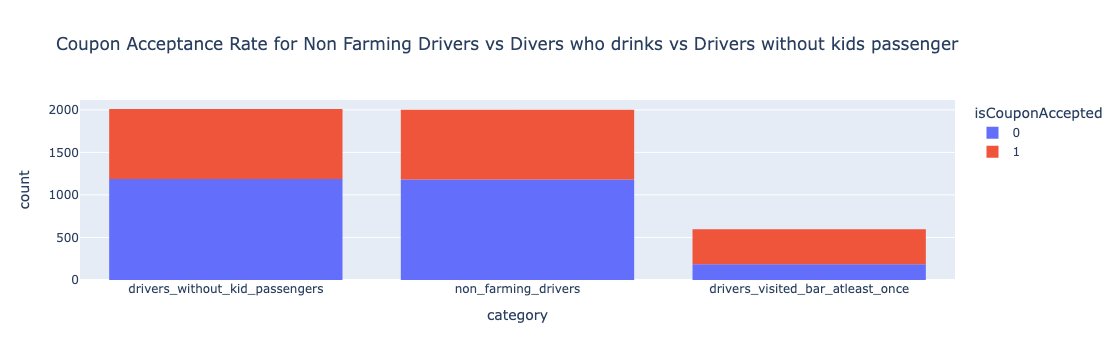

In [246]:
import plotly.express as px
# Using plotly for comparing multiple DataFrames 
px.histogram(bar_drivers_union_df, x="category", color="isCouponAccepted", title="Coupon Acceptance Rate for Non Farming Drivers vs Divers who drinks vs Drivers without kids passenger")



Text(0, 0.5, 'Acceptance or Rejection Count')

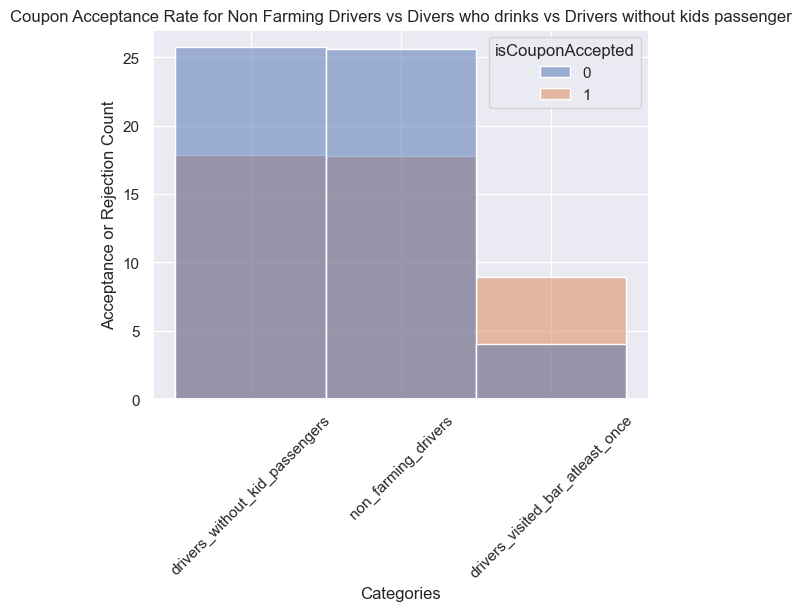

In [248]:
# Comparing the above categories using Seaborn hist plot
sns.histplot(bar_drivers_union_df, x = 'category', stat="percent", hue="isCouponAccepted")
# x = 'isCouponAccepted', stat="percent", 
plt.title('Coupon Acceptance Rate for Non Farming Drivers vs Divers who drinks vs Drivers without kids passenger')
plt.xlabel('Categories')
plt.tick_params(axis='x', rotation=45)
plt.ylabel('Acceptance or Rejection Count')

##### Observations 

* Drivers without kid passengers has highest coupon acceptance

### 6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  